# 2_IDA_Exam_Pre_processing_Model_Training_numeric_feature_selected

Inhalt:

- Data Preprocessing mit numerischer Umwandulung
- Features selection 
- Train , Tune und Validate Models
- Test Final Model
- EDA der neuen Daten

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [2]:
df= pd.read_csv('einkommen.train', sep=",", na_values = " ?", header=None)

columns = ["Age", "Employment_type", "Interview_dependent_weight", "Education_level", "Schooling/training_period", "Marital_Status", "Employment_area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Weekly_working_time", "Country", "Income"]
df.columns = columns

#  Split Data zwischen df_5000 ( mit Income Label) u. df_25000(ohne Income Label)

In [3]:
key = df["Income"].isnull()  #https://stackoverflow.com/questions/36525020/how-to-filter-na-values-and-add-it-to-a-new-dataframe
df_25000 = df.loc[key]
df_5000 = df.loc[~key] # not na value

# Data Pre-Processing

In [4]:
df_copy_new=df.copy()

# Umwandlung der diskreten Attribute zu numerischen

In [5]:
# replacing values https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/
labels = df_copy_new["Employment_type"].dropna().unique() #numerische nach was am häufigsten vorkommt Männer 1 udn Frauen 2
df_copy_new['Employment_type'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True) # +1 damit wir letzets Element bekommen

In [6]:
labels = df_copy_new["Education_level"].dropna().unique()
df_copy_new['Education_level'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [7]:
labels = df_copy_new["Marital_Status"].dropna().unique()
df_copy_new['Marital_Status'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [8]:
labels = df_copy_new["Employment_area"].dropna().unique()
df_copy_new['Employment_area'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [9]:
labels = df_copy_new["Partnership"].dropna().unique()
df_copy_new['Partnership'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [10]:
labels = df_copy_new["Ethnicity"].dropna().unique()
df_copy_new['Ethnicity'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [11]:
labels = df_copy_new["Country"].dropna().unique()
df_copy_new['Country'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [12]:
labels = df_copy_new["Gender"].dropna().unique()
df_copy_new['Gender'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [13]:
labels = df_copy_new["Income"].dropna().unique()
df_copy_new['Income'].replace(labels,
                        list(range(1,len(labels)+1)), inplace=True)

In [14]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         30000 non-null  int64  
 1   Employment_type             28323 non-null  float64
 2   Interview_dependent_weight  30000 non-null  int64  
 3   Education_level             30000 non-null  int64  
 4   Schooling/training_period   30000 non-null  int64  
 5   Marital_Status              30000 non-null  int64  
 6   Employment_area             28318 non-null  float64
 7   Partnership                 30000 non-null  int64  
 8   Ethnicity                   30000 non-null  int64  
 9   Gender                      30000 non-null  int64  
 10  Gains                       30000 non-null  int64  
 11  Losses                      30000 non-null  int64  
 12  Weekly_working_time         30000 non-null  int64  
 13  Country                     294

Fast alle ML algo erwarten Numerische werte anstatt,kategorische/String Werte,deshalb muss man die string/diskreten  Werte in numerische Werte umwandelt 
- besonders lineare Modelle berechnen Vektorprodukt aus Attributen und Parameter vektor

# Korrelations plot nach Umwandlung

<AxesSubplot:>

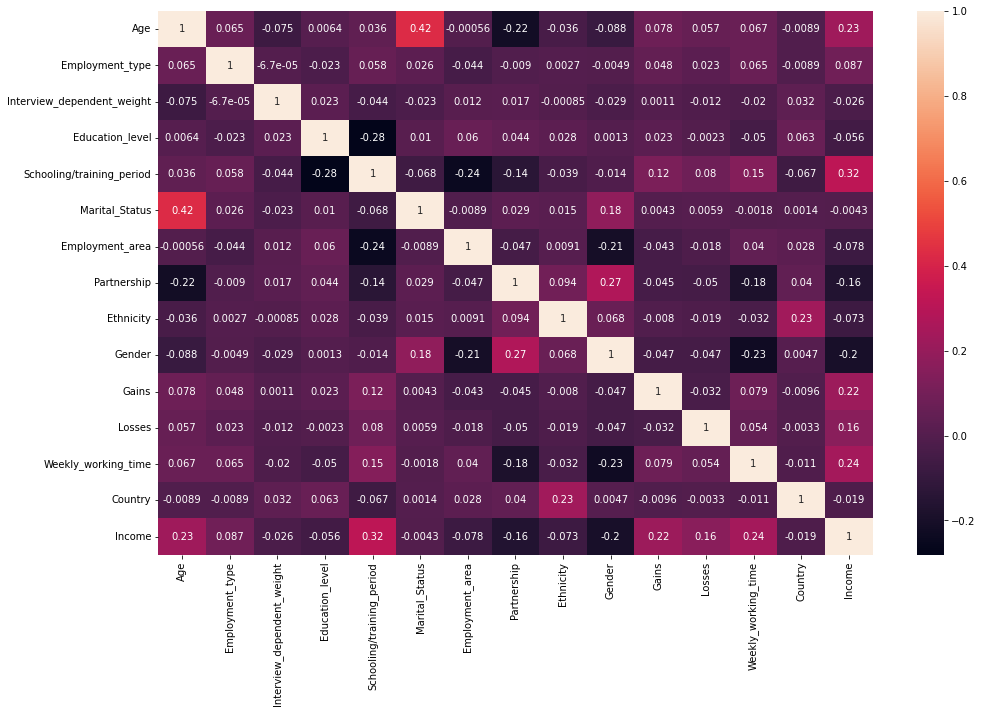

In [15]:
# calculate the correlation matrix
fig = plt.figure(figsize=(16,10))
corr = df_copy_new.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns)

Man sieht mindestens 1-2 "starke" Korrelationen in diesen Plot:
- Age und Marital Status 
- oder Income und Schooling Period
- Je älter man ist desto höher ist die Chance das man heiratet 
- bei income u. trainings period: Je mehr Erfahrung man hat desto mehr Einkommen verdient man
- aber das sind sehr sehr schwache korrelationen

# Löschen unwichtiger Features/Spalten

In [16]:
del df_copy_new['Country']

In [17]:
del df_copy_new['Ethnicity']

In [18]:
df_copy_new.shape

(30000, 13)

 - Ich habe mich dafür entschieden das Country gelöscht wird ,da mehr als 90 % aus USA stammt und dies ein Unbalanced feature dann ist und wenn man z.B. die missing values einfüllen will ,mit dem max. wären es nochmehr USA. 
 - Oder zu other hinzufügen würde ,ändert sich nichts großes an der Verteilung
 - Enthnicity wurde gelöscht ,da ICH kein Model erschaffen will, dass etwas klassifiziert basierend auf Diskriminierung, wie der Hautfarbe oder Abstammung 

# Filling Missing Values für  Employment_type und Employment area

In [19]:
df_copy_new['Employment_area'] = df_copy_new['Employment_area'].fillna(df_copy_new['Employment_area'].median())

Die missing Values bei Employment_area wurden mit dem median ersetzte, da die Verteilung der Attribute "fast" gleich verteilt war, weshalb ich mich dafür entschiedenden habe
- Mean nicht, da man sonst 4.5 hätte und man nicht sagen kann ob es Klasse 4 oder 5 wäre

In [20]:
# counting unique items
item_counts = df_copy_new["Employment_type"].value_counts()
print(item_counts) #max value nehmen

3.0    20901
2.0     2363
5.0     1928
1.0     1189
6.0     1037
4.0      887
7.0       13
8.0        5
Name: Employment_type, dtype: int64


In [21]:
df_copy_new["Employment_type"]=df_copy_new["Employment_type"].fillna(3.0)

In [22]:
# counting unique items
item_counts = df_copy_new["Employment_type"].value_counts()
print(item_counts) #max value nehmen

3.0    22578
2.0     2363
5.0     1928
1.0     1189
6.0     1037
4.0      887
7.0       13
8.0        5
Name: Employment_type, dtype: int64


Bei Employment-type habe ich mich für den max value (das Attribut was am häufisgten vor kommt) entschieden, da Privat fast 70% vertreten war

In [23]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         30000 non-null  int64  
 1   Employment_type             30000 non-null  float64
 2   Interview_dependent_weight  30000 non-null  int64  
 3   Education_level             30000 non-null  int64  
 4   Schooling/training_period   30000 non-null  int64  
 5   Marital_Status              30000 non-null  int64  
 6   Employment_area             30000 non-null  float64
 7   Partnership                 30000 non-null  int64  
 8   Gender                      30000 non-null  int64  
 9   Gains                       30000 non-null  int64  
 10  Losses                      30000 non-null  int64  
 11  Weekly_working_time         30000 non-null  int64  
 12  Income                      5000 non-null   float64
dtypes: float64(3), int64(10)
memory

# Removing Duplicates

In [24]:
df_copy_new= df_copy_new.drop_duplicates(keep='first') 
#https://blog.hubspot.com/website/duplicated-pandas

In [25]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29981 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         29981 non-null  int64  
 1   Employment_type             29981 non-null  float64
 2   Interview_dependent_weight  29981 non-null  int64  
 3   Education_level             29981 non-null  int64  
 4   Schooling/training_period   29981 non-null  int64  
 5   Marital_Status              29981 non-null  int64  
 6   Employment_area             29981 non-null  float64
 7   Partnership                 29981 non-null  int64  
 8   Gender                      29981 non-null  int64  
 9   Gains                       29981 non-null  int64  
 10  Losses                      29981 non-null  int64  
 11  Weekly_working_time         29981 non-null  int64  
 12  Income                      4999 non-null   float64
dtypes: float64(3), int64(10)
memory

Es wurden Duplikate gelöscht, da die redudant wären für das Model und beim lernen und training der daten wird es schneller da der Datensatz kleiner ist
- da es nur 19 Zeilen waren war es keine starke reduktion bzw. verlust

In [26]:
df_copy_new = df_copy_new.astype('Int64')  

In [27]:
df_copy_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29981 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         29981 non-null  Int64
 1   Employment_type             29981 non-null  Int64
 2   Interview_dependent_weight  29981 non-null  Int64
 3   Education_level             29981 non-null  Int64
 4   Schooling/training_period   29981 non-null  Int64
 5   Marital_Status              29981 non-null  Int64
 6   Employment_area             29981 non-null  Int64
 7   Partnership                 29981 non-null  Int64
 8   Gender                      29981 non-null  Int64
 9   Gains                       29981 non-null  Int64
 10  Losses                      29981 non-null  Int64
 11  Weekly_working_time         29981 non-null  Int64
 12  Income                      4999 non-null   Int64
dtypes: Int64(13)
memory usage: 3.6 MB


#  Split Daten worauf man das Model trainieren und testen will (df_5000) und Vorhersage machen will (df_25000) 

In [28]:
key = df_copy_new["Income"].isnull()  #https://stackoverflow.com/questions/36525020/how-to-filter-na-values-and-add-it-to-a-new-dataframe
df_25000 = df_copy_new.loc[key]
df_5000 = df_copy_new.loc[~key] # not na value

In [29]:
label = df_5000['Income']
df_x = df_5000.drop(columns=['Income'])

In [30]:
label=label-1

In [31]:
label.unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [32]:
label=label.astype(bool) 

In [33]:
label

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996     True
4997     True
4998    False
4999    False
Name: Income, Length: 4999, dtype: bool

# Feature Selection durch tree.feature importances

In [34]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_x , label, test_size=.33, random_state=42)

tree = RandomForestClassifier()
tree.fit(X_train, y_train)

importances = tree.feature_importances_

Warum Feature selection?:
- Redudante oder noise Attribute haben negative inpact auf der Model performence
- dadurch wird der Trainingsdatensatz kleiner und man trainiert und testet schneller

Es wurde für die feature selection die methode tree.feature importances:
- Es werden einfach die Reihenfolge der Spalten genommen, anhand derer die Daten geteilt werden im Random Forest, da die Algorithmen ja in sich bereits versuchen Schritt für Schritt die Daten immer homogener aufzuteilen. 

Grund für Entscheidung: 

- eines der meist bekannteste Feature selection Methode: https://vitalflux.com/feature-importance-random-forest-classifier-python/

- es wurde nur eine Feature selection methode eingesetzt für alle ML Modele da der Fokus auf die Vorhersage der Modelle war
- und damit man es einen fair vergleichen mit allen Modellen geben kann 

Feature: 0, Score: 0.15710
Feature: 1, Score: 0.04261
Feature: 2, Score: 0.15544
Feature: 3, Score: 0.04088
Feature: 4, Score: 0.09154
Feature: 5, Score: 0.09336
Feature: 6, Score: 0.07765
Feature: 7, Score: 0.08740
Feature: 8, Score: 0.01664
Feature: 9, Score: 0.11537
Feature: 10, Score: 0.03489
Feature: 11, Score: 0.08711


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

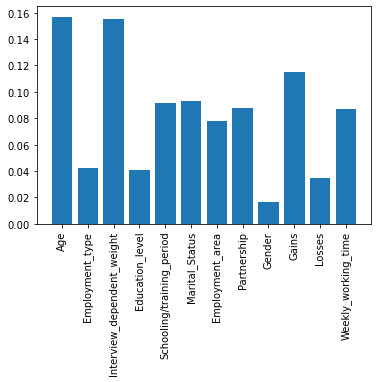

In [36]:
# summarize feature importance
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importances))], importances)
plt.bar(df_x.columns,importances)
plt.xticks(rotation=90)

In [37]:
features_value, features_name = zip(*sorted(zip(importances, df_5000.columns),reverse=True))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

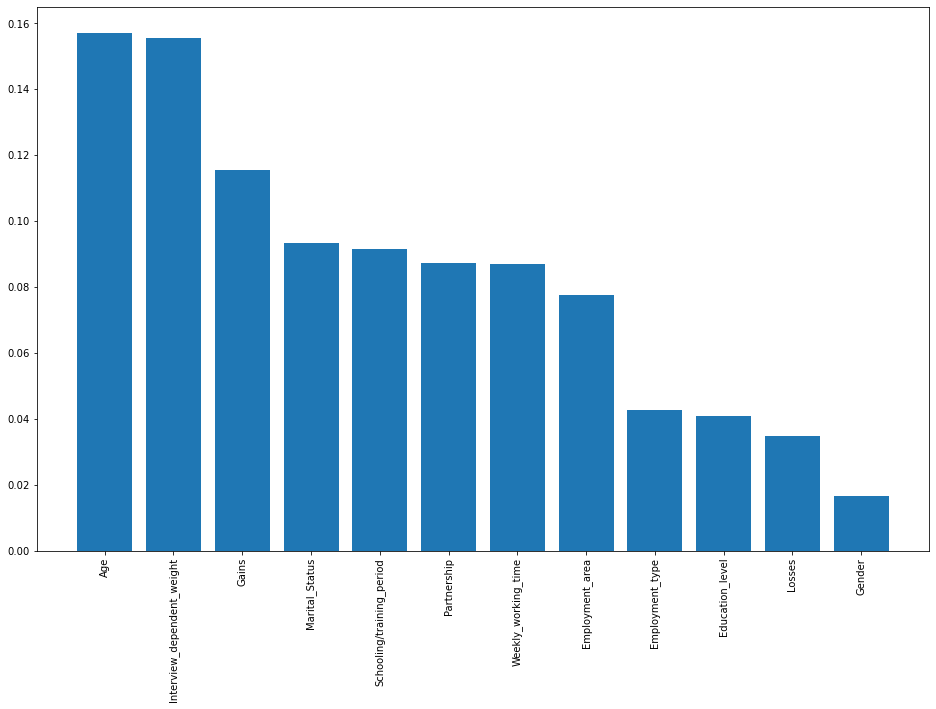

In [38]:

fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
plt.bar(features_name,features_value)
plt.xticks(rotation=90)

In [39]:
important_features= features_name[:5] 

In [40]:
important_features

('Age',
 'Interview_dependent_weight',
 'Gains',
 'Marital_Status',
 'Schooling/training_period')

Basierenden auf diesen Plot gibt es 2-3 Features, die sehr wichtig sind, weshalb ich mehr genommen habe da es sonst zu wenige Spalten wären
- feature 4-5 sind ähnlich und wurden deshalb als trashhold genommen
- So wurden die Features: Interview_dependent_weight','Age','Gains','Weekly_working_time', und 'Marital_Status ausgewählt

# Splitting data into Train,Validate und Test

In [41]:
df_y=label.astype(int) 
df_y= pd.Series(df_y,name="Income")

df_y.to_frame()

,Income
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,1
4997,1
4998,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.30, random_state=42)

- Standard gemäß ist wird Train und Test auf 80% und 20 % geteilt
- Beim Validieren wurde der Trainingsdatensatz auf 70% und 30% geteilt, da ich mehr valdieren wollte und es mir wichtiger war. 

In [43]:
important_features=list(important_features)
print(important_features)
print(type(important_features))

['Age', 'Interview_dependent_weight', 'Gains', 'Marital_Status', 'Schooling/training_period']
<class 'list'>


In [44]:
#Nur die Important Spalten sollen verwendet werden
X_train_features = X_train[important_features]

X_valid_features = X_valid[important_features]
X_test_features = X_test[important_features]  

#  Model Selection (Training, Tuning Hyperparameter and Validate)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html
import numpy as np
from sklearn.linear_model import RidgeClassifier

Als ML Modelle für das Problem habe ich mich für folgende ML Modele entschieden:

Randome Forest:

- wurde entschieden, da Random forest eine hohe performence liefert beim klassifizieren und allgemein sehr gut für prediction ist laut der Literatur https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706
- Hyperparamter tuning ist nicht sehr relevant ebenfalls , weshalb man nicht soviele Paramter tunen muss.
- Random Forest ist es auch sehr gut, da es egal ist welche Datenart man nutzen kann (Kategorischen und Continurliche Werten , welche wir größtenteils haben)
- Entscheidungsbäume sind in der Lage, verständliche Regeln zu erstellen.
https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706
https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/
https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
https://www.geeksforgeeks.org/decision-tree/

Decision Tree:
- Bei Decision tree ist alles was bei Random Forest war auch auch als Begründung
- Auch sehr einfach zu interpretieren
- Beide Modelle wurden genommen, da ich die Performence zwischen einen Baume vs mehrer Bäume vergleichen wollte

SVM Classifier:

- Ich habe mich dafür entschieden, da ich die Vermutung "Das die Daten linear seperiert" sind nicht mehr braucht
- Grund: SVM nutz den Kernel trick und dadurch müssen die Daten nicht seperiert sein, da die Seperation in einen anderen Raum/Space gelernt wird https://iq.opengenus.org/advantages-of-svm/
- overfitting geringe chance 
- SVM ist nützlich, um die trennende Hyperebene zu finden. Die Suche nach einer Hyperebene kann nützlich sein, um die Daten korrekt zwischen verschiedenen Gruppen zu klassifizieren.
https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/
https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

Logistische Regression
- Es macht keine Annahmen über die Verteilungen der Klassen im Merkmalsraum.(Class imbalance egal)
- In einem niedrigdimensionalen Datensatz mit einer ausreichenden Anzahl von Trainingsbeispielen ist die logistische Regression weniger anfällig für Overfitting, was bei uns der Fall ist
https://iq.opengenus.org/advantages-and-disadvantages-of-logistic-regression/
https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/



Allgemein

- Neuronale nicht weil SVM schneller durch läuft beim trainieren als ein Neuronales Netz
- man braucht mehr Daten für Neuronalen Netztwerken



Wie wird trainiert ,getuned ,validiert und getestet?

1. Für jedes Model Trainieren und validieren wir  mit 5 cross validation um die idealen HP zu finden
- Der mean der ACC und die Std. wird genutzen,für pro Paramter berechnet (in diesen Fall 5 ACC)
2. Dann wird mit dem Idealen Parameter auf den ganzen Trainingsdatensatz trainiert und auf den Validation Datensatz validiert
3. Das wird dann mit allen anderen Modelen mit ihren jeweiligen Parametern verglichen und anhand der ACC und dem F1 Score wird entschieden, was das Finale beste Model ist was wir mit dem Test datensatz testen

Warum diese Methoden?

- cross validation um overfitting zu vermeiden, da wir verschiede Datensätze nehmen und immer trainieren und evaluieren (so nutzen wir den kompletten dateznsatz fürs training und validieren der Hyperparameter

- Für jeden Hyperparamter haben wir ein Model trainiert mit cross validation damit wir sehen welches Hyperparamter das beste ist

- mit Cross validation schauen wir für jedes Model des Hyperparameter, den mean und SD der ACC 

- SD wurde angeschaut um zu sehen wie weit die voeinander verstreut sind , denn ein hoher sd würde, bedeuten wir hätten verschieden gute bis schlechte Modelle bei diesen Parameter(je kleiner desto besser)

- Validation datensatz wurde genommen für alle daten damit man einen fair vergleichen hat


Nach dem trainiert wurde und die passenden HP gefunden wurden, wurde das Model mit dem HP validiert

- wir wollen alle besten  Modelle  valdieren und vergleichen was wir am Ende dann aussuchen für den test datensatz

- F1 Score: Acc ist nicht gut bei unbalanced datensatz
- aber mit den F1 score kann man sehen wieve Bsp. das Model falsch klassifiert bwz richtig





# Random Forest

In [46]:
#https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/
# prepare the cross-validation procedure
cv = KFold(n_splits=5,)
n_estimators_range= list(range(1, 101)) #107 
#max_depth_range=list(range(1,6)) # weniger tiefe weil wie viele Bäume haben  
list_scores = []
list_stds= []
for n in n_estimators_range:
    RFC = RandomForestClassifier(n_estimators=n,max_depth=4, random_state=0)
    scores = cross_val_score(RFC ,X_train_features, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (n,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

#print(list_scores)
max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.794 (0.009)
Train Accuracy:2 0.800 (0.015)
Train Accuracy:3 0.815 (0.013)
Train Accuracy:4 0.827 (0.015)
Train Accuracy:5 0.827 (0.015)
Train Accuracy:6 0.821 (0.020)
Train Accuracy:7 0.821 (0.019)
Train Accuracy:8 0.827 (0.013)
Train Accuracy:9 0.822 (0.011)
Train Accuracy:10 0.822 (0.012)
Train Accuracy:11 0.823 (0.013)
Train Accuracy:12 0.823 (0.013)
Train Accuracy:13 0.824 (0.013)
Train Accuracy:14 0.819 (0.010)
Train Accuracy:15 0.815 (0.014)
Train Accuracy:16 0.814 (0.013)
Train Accuracy:17 0.817 (0.014)
Train Accuracy:18 0.823 (0.015)
Train Accuracy:19 0.822 (0.014)
Train Accuracy:20 0.827 (0.007)
Train Accuracy:21 0.827 (0.008)
Train Accuracy:22 0.827 (0.008)
Train Accuracy:23 0.827 (0.007)
Train Accuracy:24 0.827 (0.007)
Train Accuracy:25 0.828 (0.007)
Train Accuracy:26 0.829 (0.007)
Train Accuracy:27 0.828 (0.008)
Train Accuracy:28 0.829 (0.007)
Train Accuracy:29 0.828 (0.007)
Train Accuracy:30 0.829 (0.007)
Train Accuracy:31 0.830 (0.006)
Train Accuracy:32

Text(0, 0.5, 'Cross-Validated Accuracy')

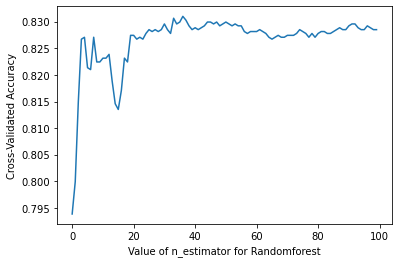

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
 

plt.plot(list(range(100)),list_scores)
plt.xlabel('Value of n_estimator for Randomforest')
plt.ylabel('Cross-Validated Accuracy')

Bester Hyperparamter ist 50 für n_estimator

In [48]:
RFC = RandomForestClassifier(n_estimators=50,max_depth=4, random_state=0)
RFC.fit(X_train_features, y_train)
y_pred = RFC.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.843


In [49]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[887  42]
 [146 125]]

Precision: 0.749
Recall: 0.461
F-1-Score: 0.571


# Decision Tree

In [50]:
max_depth_range=list(range(1,54))  
list_scores = []
list_stds= []
for md in max_depth_range:
    clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=md) 
    scores = cross_val_score(clf_tree ,X_train_features, y_train, scoring='accuracy', cv=cv)
    print('Train Accuracy:%d %.3f (%.3f)' % (md,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:1 0.762 (0.028)
Train Accuracy:2 0.762 (0.027)
Train Accuracy:3 0.791 (0.006)
Train Accuracy:4 0.827 (0.007)
Train Accuracy:5 0.829 (0.007)
Train Accuracy:6 0.826 (0.012)
Train Accuracy:7 0.822 (0.005)
Train Accuracy:8 0.822 (0.007)
Train Accuracy:9 0.815 (0.005)
Train Accuracy:10 0.811 (0.012)
Train Accuracy:11 0.806 (0.013)
Train Accuracy:12 0.805 (0.007)
Train Accuracy:13 0.800 (0.008)
Train Accuracy:14 0.794 (0.006)
Train Accuracy:15 0.796 (0.008)
Train Accuracy:16 0.793 (0.009)
Train Accuracy:17 0.791 (0.006)
Train Accuracy:18 0.789 (0.014)
Train Accuracy:19 0.790 (0.008)
Train Accuracy:20 0.787 (0.012)
Train Accuracy:21 0.785 (0.011)
Train Accuracy:22 0.783 (0.011)
Train Accuracy:23 0.785 (0.013)
Train Accuracy:24 0.781 (0.008)
Train Accuracy:25 0.783 (0.011)
Train Accuracy:26 0.781 (0.009)
Train Accuracy:27 0.779 (0.012)
Train Accuracy:28 0.782 (0.011)
Train Accuracy:29 0.781 (0.011)
Train Accuracy:30 0.779 (0.011)
Train Accuracy:31 0.781 (0.009)
Train Accuracy:32

Text(0, 0.5, 'Cross-Validated Accuracy')

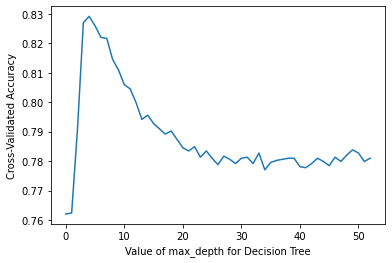

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(list(range(53)),list_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

Bester Paramter für max_depth ist 5

In [52]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf_tree.fit(X_train_features, y_train)
y_pred = clf_tree.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.846


In [53]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[878  51]
 [134 137]]

Precision: 0.729
Recall: 0.506
F-1-Score: 0.597


# SVM Classifier

In [54]:
#https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
C_range=[100, 10, 1.0, 0.1, 0.001]
list_scores = []
list_stds= []
for c in C_range:
    svc  = make_pipeline(StandardScaler(), SVC(gamma='auto',C=c))
    scores = cross_val_score(svc ,X_train_features, y_train, scoring='accuracy', cv=cv)
    
    print('Train Accuracy:%.3f %.3f (%.3f)' % (c,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:100.000 0.821 (0.008)
Train Accuracy:10.000 0.827 (0.006)
Train Accuracy:1.000 0.816 (0.006)
Train Accuracy:0.100 0.803 (0.009)
Train Accuracy:0.001 0.748 (0.015)
1


Text(0, 0.5, 'Cross-Validated Accuracy')

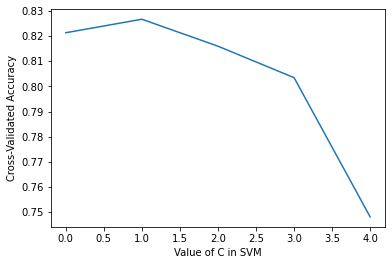

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(list(range(5)),list_scores)
plt.xlabel('Value of C in SVM')
plt.ylabel('Cross-Validated Accuracy')

Bester Paramter für den Regularisiererparamter ist 10

In [56]:
svc  = make_pipeline(StandardScaler(), SVC(gamma='auto',C=10.0)) #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
svc.fit(X_train_features,y_train)
y_pred = svc .predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.847


In [57]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[884  45]
 [139 132]]

Precision: 0.746
Recall: 0.487
F-1-Score: 0.589


# Logistische Regression

In [58]:
C_range=[100, 10, 1.0, 0.1, 0.001]
list_scores = []
list_stds= []
for c in C_range:
    LoR = LogisticRegression(penalty="l2",C=c)
    scores = cross_val_score(LoR ,X_train_features, y_train, scoring='accuracy', cv=cv)
    
    print('Train Accuracy:%.3f %.3f (%.3f)' % (c,mean(scores), std(scores)))
    list_scores.append(mean(scores))
    list_stds.append(std(scores))
        

max_value = max(list_scores) #Return the max value of the list.
max_index = list_scores.index(max_value) #Find the index of the max value.
print(max_index)

Train Accuracy:100.000 0.787 (0.010)
Train Accuracy:10.000 0.787 (0.010)
Train Accuracy:1.000 0.787 (0.010)
Train Accuracy:0.100 0.787 (0.010)
Train Accuracy:0.001 0.788 (0.010)
4


Text(0, 0.5, 'Cross-Validated Accuracy')

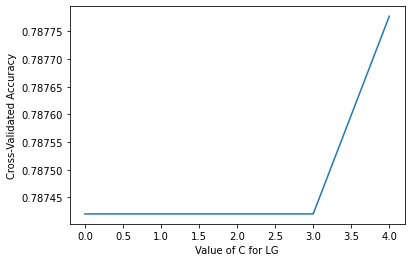

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(list(range(5)),list_scores)
plt.xlabel('Value of C for LG')
plt.ylabel('Cross-Validated Accuracy')

Bester parameter für  C ist 0.001

In [60]:
LoR = LogisticRegression(penalty="l2",C=0.001)
LoR.fit(X_train_features,y_train)
y_pred = LoR.predict(X_valid_features)
acc_score = accuracy_score(y_valid,y_pred)  
print ("Validation Accuracy: %.3f" % (acc_score))

Validation Accuracy: 0.801


In [61]:
from sklearn import metrics
print ("Confusion Matrix: \n " , confusion_matrix(y_valid,y_pred))
print()
print("Precision: %.3f" % (metrics.precision_score(y_valid, y_pred)))
print("Recall: %.3f" % (metrics.recall_score(y_valid, y_pred)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_valid, y_pred)))

Confusion Matrix: 
  [[912  17]
 [222  49]]

Precision: 0.742
Recall: 0.181
F-1-Score: 0.291


# Final Model Testing

Aufgrund der Validation ACC und dem F1 Score wurde entschieden Decision tree zu wählen

In [66]:
predictions = clf_tree.predict(X_test_features)

In [67]:
acc_score = accuracy_score(y_test,predictions)  
print ("Test Accuracy: %.3f" % (acc_score))
print()
print ("Confusion Matrix: \n " , confusion_matrix(y_test,predictions))
print()
print("Precision: %.3f" % (metrics.precision_score(y_test,predictions)))
print("Recall: %.3f" % (metrics.recall_score(y_test,predictions)))
print("F-1-Score: %.3f" % ( metrics.f1_score(y_test,predictions)))

Test Accuracy: 0.853

Confusion Matrix: 
  [[719  36]
 [111 134]]

Precision: 0.788
Recall: 0.547
F-1-Score: 0.646


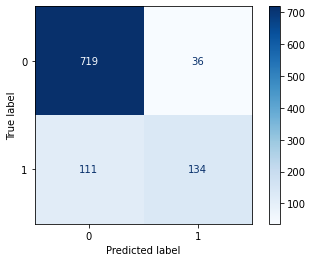

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       755
           1       0.79      0.55      0.65       245

    accuracy                           0.85      1000
   macro avg       0.83      0.75      0.78      1000
weighted avg       0.85      0.85      0.84      1000



In [68]:
#https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(clf_tree, X_test_features, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test,predictions))

# Ploting ROC und berechne AUC

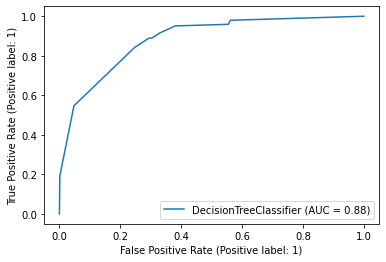

In [71]:
from sklearn import datasets, metrics, model_selection
metrics.plot_roc_curve(clf_tree, X_test_features, y_test) 

# It tells how much the model is capable of distinguishing between classes.
#Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.
#By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

Zeigt uns wie gut das Model Negative und postive Samples unterscheiden kann:
- je höher Area under the curv ist, desto besser schneidet das Model bei der Prediction ab
- 1 wäre am besten
- Wenn der AUC-Wert 0,88 beträgt, bedeutet dies, dass das Modell mit einer Wahrscheinlichkeit von 88 % in der Lage ist, zwischen einer positiven und einer negativen Klasse zu unterscheiden.
- Wenn AUC ungefähr 0,5 ist, hat das Modell keine Unterscheidungskapazität zwischen positiver und negativer Klasse.
- Liegt der AUC-Wert bei etwa 0, so ist das Modell tatsächlich in der Lage, die Klassen zu vertauschen. Das bedeutet, dass das Modell eine negative Klasse als eine positive Klasse vorhersagt und umgekehrt.



# Vorhersage für die 25000 Samples ohne Income label

In [72]:
X_25000_features = df_25000[important_features]

In [73]:
X_25000_features.shape

(24982, 5)

In [74]:
X_25000_features.head()

,Age,Interview_dependent_weight,Gains,Marital_Status,Schooling/training_period
5000,47,79627,27828,3,15
5001,55,151474,0,1,13
5002,26,132661,5013,2,9
5003,28,161674,0,1,9
5004,36,62346,0,2,9


In [75]:
Final_predictions25000 = clf_tree.predict(X_25000_features)

In [76]:
Final_predictions25000

array([1, 0, 0, ..., 0, 0, 0])

Merge new data und labels 

In [77]:
df_Final_predictions25000= pd.DataFrame(Final_predictions25000, columns=['Income'])

In [78]:
df_Final_predictions25000

,Income
0,1
1,0
2,0
3,0
4,0
...,...
24977,0
24978,0
24979,0
24980,0


In [79]:
df_25000['Income'] = df_Final_predictions25000['Income'].values

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_6723/3759895927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_25000['Income'] = df_Final_predictions25000['Income'].values


In [80]:
df_25000['Income']

5000     1
5001     0
5002     0
5003     0
5004     0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Income, Length: 24982, dtype: int64

In [81]:
df_5000_convert_new=df_5000.replace(1, 0)

In [82]:
df_5000_convert_new=df_5000_convert_new.replace(2, 1)

In [83]:
frames_new = [df_25000,df_5000_convert_new ]

result_new = pd.concat(frames_new)

In [84]:
result_new

,Age,Employment_type,Interview_dependent_weight,Education_level,Schooling/training_period,Marital_Status,Employment_area,Partnership,Gender,Gains,Losses,Weekly_working_time,Income
5000,47,6,79627,11,15,3,4,1,1,27828,0,50,1
5001,55,3,151474,1,13,1,11,6,2,0,1590,38,0
5002,26,3,132661,2,9,2,2,3,2,5013,0,40,0
5003,28,3,161674,2,9,1,10,5,2,0,0,40,0
5004,36,3,62346,2,9,2,7,2,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,3,222971,12,3,0,10,5,1,0,0,40,0
4996,31,3,259425,1,9,1,7,1,0,0,0,40,1
4997,47,6,212120,1,9,1,7,1,0,0,0,40,1
4998,26,3,245880,1,9,0,0,0,0,0,0,60,0


# Korrelationsplot für neuen daten nach prediction

<AxesSubplot:>

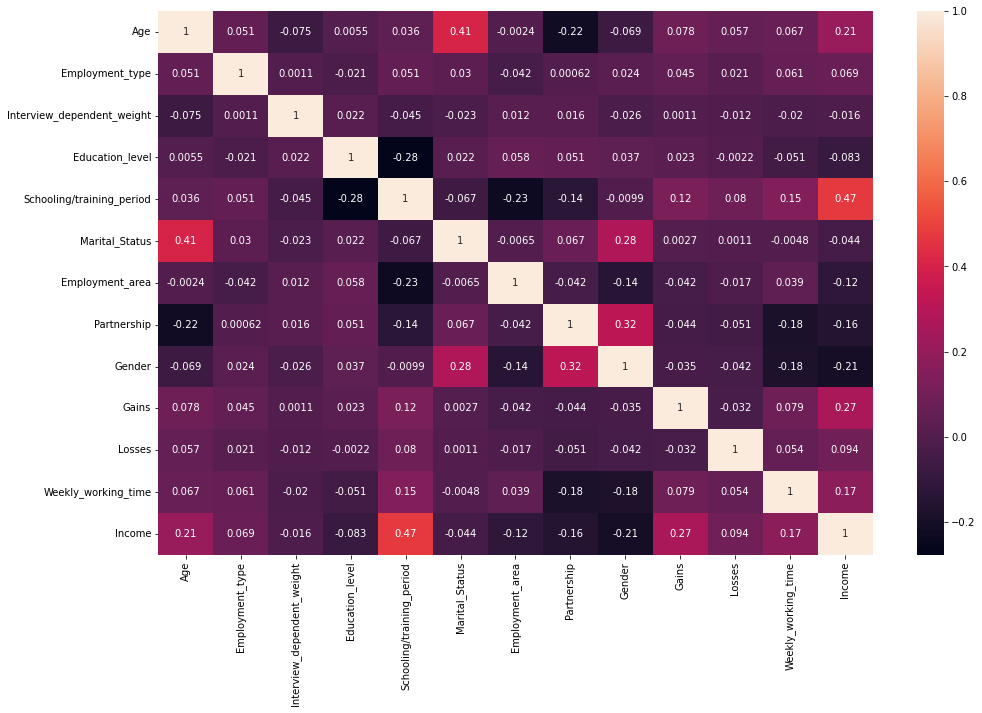

In [85]:
fig = plt.figure(figsize=(16,10))
corr = result_new.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,xticklabels=corr.columns,yticklabels=corr.columns)

Koorelation ist minimal höher geworden

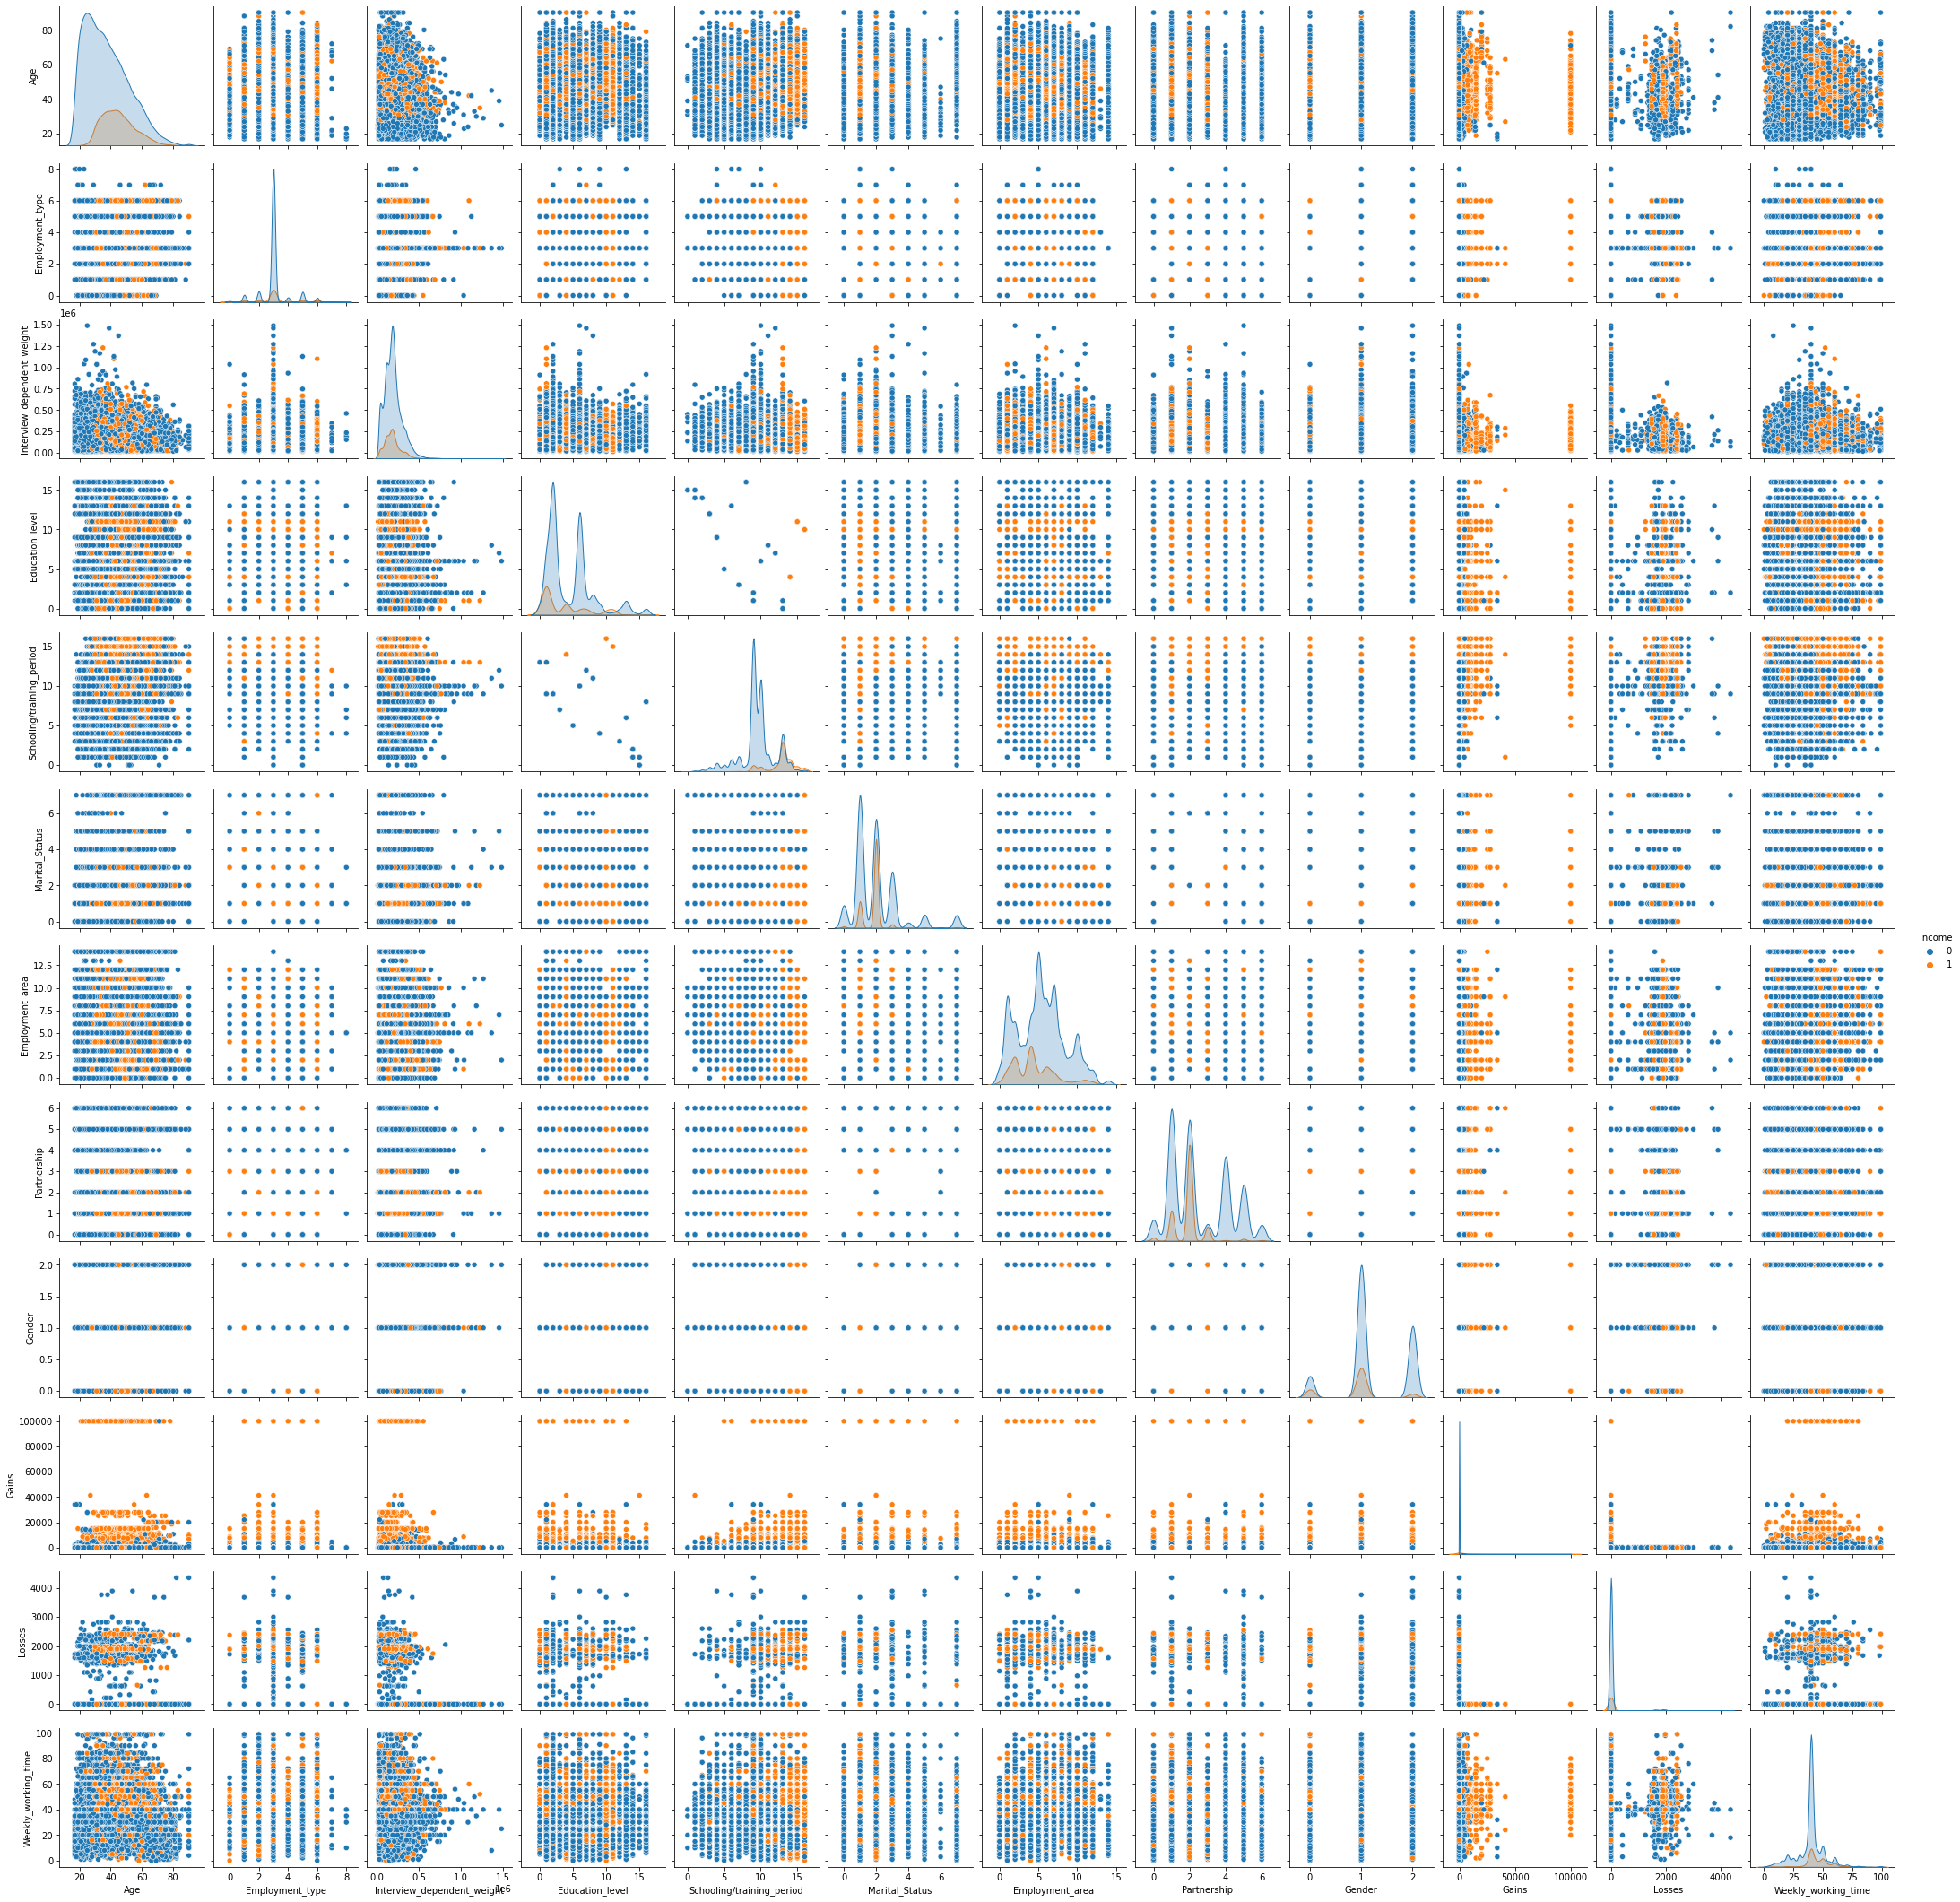

In [86]:
sns.pairplot(result_new,hue="Income")

Nur bei Gains ist eine Seperation vorhanden

<AxesSubplot:xlabel='Income', ylabel='count'>

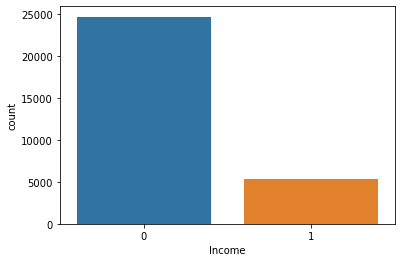

In [87]:
sns.countplot(x="Income",data=result_new)

<AxesSubplot:xlabel='Income', ylabel='count'>

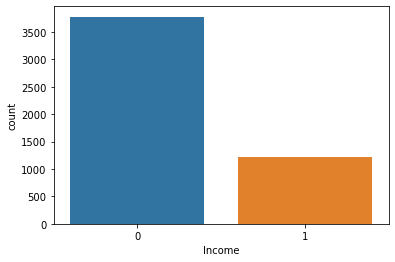

In [88]:
sns.countplot(x="Income",data=df_5000_convert_new)

<AxesSubplot:xlabel='Income', ylabel='count'>

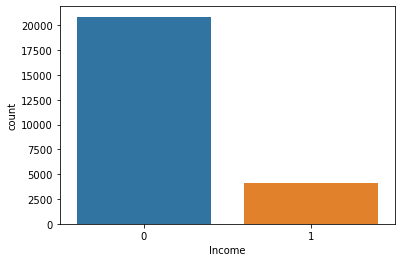

In [89]:
sns.countplot(x="Income",data=df_25000)

In [90]:
print(df_25000["Income"].value_counts())
print(df_5000_convert_new["Income"].value_counts())
print(result_new["Income"].value_counts())

0    20869
1     4113
Name: Income, dtype: int64
0    3778
1    1221
Name: Income, dtype: Int64
0    24647
1     5334
Name: Income, dtype: Int64


In [91]:
print(df_25000["Income"].value_counts()/len(df_25000))
print(df_5000_convert_new["Income"].value_counts()/len(df_5000_convert_new))
print(result_new["Income"].value_counts()/len(result_new))

0    0.835361
1    0.164639
Name: Income, dtype: float64
0    0.755751
1    0.244249
Name: Income, dtype: Float64
0    0.822087
1    0.177913
Name: Income, dtype: Float64


Man erkennt das weniger Income label von 1 generiert wurden prozentual